# House Price Regression Project - Utkarsh Gaikwad

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 - Data Ingestion

In [2]:
import pandas as pd
df = pd.read_csv("training_set.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Step 2 - Perform basic data quality checks

In [4]:
df.shape

(1460, 81)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
m = df.isna().sum()
m

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
m[m>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

### Step 3 - Seperate X and Y(SalePrice)
Id is just a serial number so drop this columns

In [8]:
X = df.drop(columns=["Id", "SalePrice"])
Y = df[["SalePrice"]]

In [9]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [10]:
Y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


<Axes: xlabel='SalePrice', ylabel='Count'>

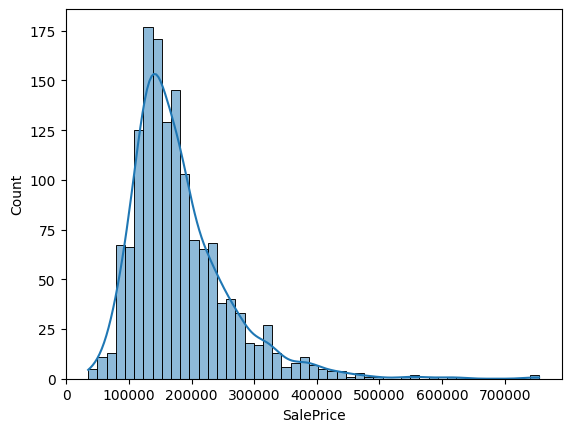

In [11]:
import seaborn as sns
sns.histplot(data=Y, x="SalePrice", kde=True)

### Step 4 - Feature Selection
Select important columns which are affecting SalePrice

Categorical - OrdinalEncoder

In [12]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [13]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [14]:
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [16]:
num_pipe1 = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [17]:
cat_pipe1 = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NotAvail"),
    OrdinalEncoder()
)

In [18]:
pre1 = ColumnTransformer(
    [
        ("num", num_pipe1, con),
        ("cat", cat_pipe1, cat)
    ]
).set_output(transform="pandas")

In [19]:
X_pre = pre1.fit_transform(X)
X_pre.head()

,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,...,cat__GarageType,cat__GarageFinish,cat__GarageQual,cat__GarageCond,cat__PavedDrive,cat__PoolQC,cat__Fence,cat__MiscFeature,cat__SaleType,cat__SaleCondition
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
1,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
2,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
3,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,0.0
4,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

In [21]:
base_model = LinearRegression()
sel = SequentialFeatureSelector(
    base_model, 
    n_features_to_select="auto",
    direction="backward"
)
sel.fit(X_pre, Y)
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__MSSubClass', 'num__LotArea', 'num__OverallQual',
       'num__OverallCond', 'num__YearBuilt', 'num__MasVnrArea',
       'num__BsmtFinSF1', 'num__BsmtFinSF2', 'num__BsmtUnfSF',
       'num__TotalBsmtSF', 'num__1stFlrSF', 'num__2ndFlrSF',
       'num__LowQualFinSF', 'num__GrLivArea', 'num__BsmtFullBath',
       'num__Fireplaces', 'num__GarageCars', 'num__WoodDeckSF',
       'num__ScreenPorch', 'num__PoolArea', 'num__YrSold',
       'cat__LandContour', 'cat__Utilities', 'cat__Neighborhood',
       'cat__BldgType', 'cat__HouseStyle', 'cat__RoofMatl',
       'cat__Exterior1st', 'cat__MasVnrType', 'cat__ExterQual',
       'cat__BsmtQual', 'cat__BsmtCond', 'cat__BsmtExposure',
       'cat__HeatingQC', 'cat__KitchenQual', 'cat__Functional',
       'cat__FireplaceQu', 'cat__GarageFinish', 'cat__GarageCond',
       'cat__MiscFeature'], dtype=object)

In [22]:
len(sel_cols)

40

In [23]:
sel_cols[0]

'num__MSSubClass'

In [24]:
sel_cols[0].split("__")

['num', 'MSSubClass']

In [25]:
sel_cols[0].split("__")[1]

'MSSubClass'

In [26]:
imp_cols = [col.split("__")[1] for col in sel_cols]
imp_cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'ScreenPorch',
 'PoolArea',
 'YrSold',
 'LandContour',
 'Utilities',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageFinish',
 'GarageCond',
 'MiscFeature']

In [29]:
X_sel = X[imp_cols]
X_sel.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageCond,MiscFeature
0,60,8450,7,5,2003,196.0,706,0,150,856,...,Gd,TA,No,Ex,Gd,Typ,NaN,RFn,TA,NaN
1,20,9600,6,8,1976,0.0,978,0,284,1262,...,Gd,TA,Gd,Ex,TA,Typ,TA,RFn,TA,NaN
2,60,11250,7,5,2001,162.0,486,0,434,920,...,Gd,TA,Mn,Ex,Gd,Typ,TA,RFn,TA,NaN
3,70,9550,7,5,1915,0.0,216,0,540,756,...,TA,Gd,No,Gd,Gd,Typ,Gd,Unf,TA,NaN
4,60,14260,8,5,2000,350.0,655,0,490,1145,...,Gd,TA,Av,Ex,Gd,Typ,TA,RFn,TA,NaN


### Create a final Preprocessing Pipeline on Selected features
for final pipeline use OneHotEncoder

In [31]:
cat_sel = list(X_sel.columns[X_sel.dtypes == "object"])
con_sel = list(X_sel.columns[X_sel.dtypes != "object"]) 

In [33]:
cat_sel

['LandContour',
 'Utilities',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageFinish',
 'GarageCond',
 'MiscFeature']

In [34]:
con_sel

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'ScreenPorch',
 'PoolArea',
 'YrSold']

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
num_pipe2 = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [36]:
cat_pipe2 = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NotAvail"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
)

In [37]:
pre2 = ColumnTransformer(
    [
        ("num", num_pipe2, con_sel),
        ("cat", cat_pipe2, cat_sel)
    ]
).set_output(transform="pandas")

In [38]:
X_sel_pre = pre2.fit_transform(X_sel)
X_sel_pre.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,...,cat__GarageFinish_Unf,cat__GarageCond_Fa,cat__GarageCond_Gd,cat__GarageCond_NotAvail,cat__GarageCond_Po,cat__GarageCond_TA,cat__MiscFeature_NotAvail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.514104,0.575425,-0.288653,-0.944591,-0.459303,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.570750,1.171992,-0.288653,-0.641228,0.466465,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.325915,0.092907,-0.288653,-0.301643,-0.313369,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.073375,0.375148,1.374795,-0.517200,0.951632,1.366489,0.463568,-0.288653,-0.174865,0.199680,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


## Train Test Split

In [39]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre, Y, test_size=0.2, random_state=21)

In [40]:
xtrain.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,...,cat__GarageFinish_Unf,cat__GarageCond_Fa,cat__GarageCond_Gd,cat__GarageCond_NotAvail,cat__GarageCond_Po,cat__GarageCond_TA,cat__MiscFeature_NotAvail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
710,-0.636078,-0.640101,-2.241782,0.381743,-1.201217,-0.570750,-0.973018,-0.288653,-0.672923,-1.795509,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1098,-0.163109,-0.452686,-1.518467,0.381743,-1.168096,-0.570750,0.500854,-0.288653,-1.284176,-0.878862,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1286,-0.872563,-0.072844,-0.071836,-0.517200,-0.273836,1.925521,0.274948,0.213629,0.250749,0.616959,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
992,0.073375,-0.075851,-0.071836,2.179628,-0.240715,1.311140,0.202570,0.436865,-0.901577,-0.536830,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
631,1.492282,-0.593999,1.374795,-0.517200,1.150356,0.027027,-0.920380,-0.288653,2.179592,1.132288,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [41]:
ytrain.head()

,SalePrice
710,52000
1098,128000
1286,143000
992,187000
631,209500


In [42]:
xtest.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,...,cat__GarageFinish_Unf,cat__GarageCond_Fa,cat__GarageCond_Gd,cat__GarageCond_NotAvail,cat__GarageCond_Po,cat__GarageCond_TA,cat__MiscFeature_NotAvail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
880,-0.872563,-0.350058,-0.795151,-0.517200,1.117235,-0.570750,1.176379,-0.288653,-1.035147,0.074268,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
605,0.073375,0.309002,0.651479,0.381743,-0.207594,0.403405,0.022723,-0.288653,-0.573311,-0.659961,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1166,-0.872563,-0.004192,1.374795,-0.517200,1.216598,-0.172232,-0.973018,-0.288653,2.550871,1.451518,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
216,-0.872563,-0.207142,0.651479,-0.517200,1.084115,0.901552,1.101808,-0.288653,-0.174865,0.863222,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
970,-0.163109,0.028380,-1.518467,-1.416142,-0.737526,-0.570750,-0.973018,-0.288653,0.345832,-0.769412,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [43]:
ytest.head()

,SalePrice
880,157000
605,205000
1166,245350
216,210000
970,135000


In [44]:
xtrain.shape

(1168, 129)

In [45]:
xtest.shape

(292, 129)

### Build Different models
1. LinearRegression
2. Ridge
3. Lasso

#### 1. Linear Regression

In [46]:
model1 = LinearRegression()
model1.fit(xtrain, ytrain)

LinearRegression()

In [47]:
model1.score(xtrain, ytrain)

0.9254855117253302

In [48]:
model1.score(xtest, ytest)

0.818857516318992

### 2. Ridge model with tuning

In [49]:
import numpy as np
params = {
    "alpha" : np.arange(start=1, stop=100, step=0.5)
}

In [50]:
params

{'alpha': array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
         6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5,
        12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5, 17. ,
        17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. , 22.5,
        23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5, 28. ,
        28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5, 33. , 33.5,
        34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. , 38.5, 39. ,
        39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5, 44. , 44.5,
        45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. , 49.5, 50. ,
        50.5, 51. , 51.5, 52. , 52.5, 53. , 53.5, 54. , 54.5, 55. , 55.5,
        56. , 56.5, 57. , 57.5, 58. , 58.5, 59. , 59.5, 60. , 60.5, 61. ,
        61.5, 62. , 62.5, 63. , 63.5, 64. , 64.5, 65. , 65.5, 66. , 66.5,
        67. , 67.5, 68. , 68.5, 69. , 69.5, 70. , 70.5, 71. , 71.5, 72. ,
        72.5, 73. , 73.5, 74.

In [51]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [52]:
base_ridge = Ridge()

gscv_ridge = GridSearchCV(base_ridge, param_grid=params, cv=5, scoring="r2", n_jobs=-1)

gscv_ridge.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
        6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5,
       12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5, 17. ,
       17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. , 22.5,
       23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5, 28. ,
       28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5, 33. , 33....
       61.5, 62. , 62.5, 63. , 63.5, 64. , 64.5, 65. , 65.5, 66. , 66.5,
       67. , 67.5, 68. , 68.5, 69. , 69.5, 70. , 70.5, 71. , 71.5, 72. ,
       72.5, 73. , 73.5, 74. , 74.5, 75. , 75.5, 76. , 76.5, 77. , 77.5,
       78. , 78.5, 79. , 79.5, 80. , 80.5, 81. , 81.5, 82. , 82.5, 83. ,
       83.5, 84. , 84.5, 85. , 85.5, 86. , 86.5, 87. , 87.5, 88. , 88.5,
       89. , 89.5, 90. , 90.5, 91. , 91.5, 92. , 92.5, 93. , 93.5, 94. ,
       94.5, 95. , 95.5, 96. , 96.5, 97. , 97.5, 98. , 98.5, 99. , 99.5])},
             scoring='r2')

In [53]:
gscv_ridge.best_params_

{'alpha': np.float64(11.0)}

In [54]:
gscv_ridge.best_score_

np.float64(0.8308208209925162)

In [55]:
best_ridge = gscv_ridge.best_estimator_
best_ridge

Ridge(alpha=np.float64(11.0))

In [56]:
best_ridge.score(xtrain, ytrain)

0.8841295846522442

In [57]:
best_ridge.score(xtest, ytest)

0.8346004790063892

### 3. Lasso

In [65]:
params2 = {
    "alpha": np.arange(start=10, stop=500, step=10)
}

In [66]:
params2

{'alpha': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
        140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
        270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
        400, 410, 420, 430, 440, 450, 460, 470, 480, 490])}

In [67]:
from sklearn.linear_model import Lasso

In [68]:
base_lasso = Lasso()

gscv_lasso = GridSearchCV(base_lasso, param_grid=params2, cv=5, scoring="r2", n_jobs=-1)

gscv_lasso.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490])},
             scoring='r2')

In [70]:
gscv_lasso.best_params_

{'alpha': np.int64(140)}

In [71]:
gscv_lasso.best_score_

np.float64(0.8296790935199236)

In [72]:
best_lasso = gscv_lasso.best_estimator_
best_lasso

Lasso(alpha=np.int64(140))

In [73]:
best_lasso.score(xtrain, ytrain)

0.8796506520626826

In [74]:
best_lasso.score(xtest, ytest)

0.8350832710977237

### From above i am selecting Ridge model as it has higer cross validated score of 0.8308

### Perform all evaluation metrics on selected model

In [75]:
from sklearn.metrics import (
    root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
)

In [76]:
def evaluate_model(model, x, y):
    ypred = model.predict(x)
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [77]:
best_ridge

Ridge(alpha=np.float64(11.0))

In [78]:
print("Ridge Training Results : ")
evaluate_model(best_ridge, xtrain, ytrain)

Ridge Training Results : 
RMSE: 26778.97
MAE : 16261.98
MAPE : 9.69%
R2 : 88.41%


In [79]:
print("Ridge Testing Results :")
evaluate_model(best_ridge, xtest, ytest)

Ridge Testing Results :
RMSE: 33480.80
MAE : 17515.24
MAPE : 10.05%
R2 : 83.46%


In [80]:
ypred_test = best_ridge.predict(xtest)
ypred_test[0:5]

array([169101.97776867, 199164.36635741, 237524.55176365, 210261.20228532,
        85187.56104526])

In [81]:
ytest.head()

,SalePrice
880,157000
605,205000
1166,245350
216,210000
970,135000


### Out of sample prediction with Ridge

In [82]:
xnew = pd.read_csv("sample_set.csv")
xnew.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [83]:
xnew.shape

(1459, 80)

In [84]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['MSSubClass', 'LotArea', 'OverallQual',
                                  'OverallCond', 'YearBuilt', 'MasVnrArea',
                                  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                                  'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                                  'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
                                  'Fireplaces',...
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['LandContour', 'Utilities', 'Neighborhood',
                                  'BldgType', 'HouseStyle', 'RoofMatl',
                                  'Exterior1st', 'MasVnrType', 'ExterQual',
                                  'BsmtQual', 'BsmtCond', 'BsmtExposure',
                                  'HeatingQC', 'KitchenQual', 'Functional',
                                  'FireplaceQu', 'GarageFinish', 'GarageCond',
                                  'MiscFeature'])])

In [85]:
xnew_pre = pre2.transform(xnew)
xnew_pre.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,...,cat__GarageFinish_Unf,cat__GarageCond_Fa,cat__GarageCond_Gd,cat__GarageCond_NotAvail,cat__GarageCond_Po,cat__GarageCond_TA,cat__MiscFeature_NotAvail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
0,-0.872563,0.110763,-0.795151,0.381743,-0.340077,-0.570750,0.053428,0.604293,-0.672923,-0.400017,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,-0.872563,0.375850,-0.071836,0.381743,-0.439440,0.027027,1.051363,-0.288653,-0.365032,0.619239,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.073375,0.332053,-0.795151,-0.517200,0.852269,-0.570750,0.761852,-0.288653,-0.974021,-0.295127,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.073375,-0.054002,-0.071836,0.381743,0.885390,-0.460051,0.347326,-0.288653,-0.550672,-0.299687,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1.492282,-0.552407,1.374795,-0.517200,0.686666,-0.570750,-0.396190,-0.288653,1.018211,0.507509,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [86]:
preds = best_ridge.predict(xnew_pre)
preds

array([119511.81007356, 144675.92674672, 168817.38269279, ...,
       176631.41884304,  99951.04842247, 225411.51182462], shape=(1459,))

<Axes: ylabel='Count'>

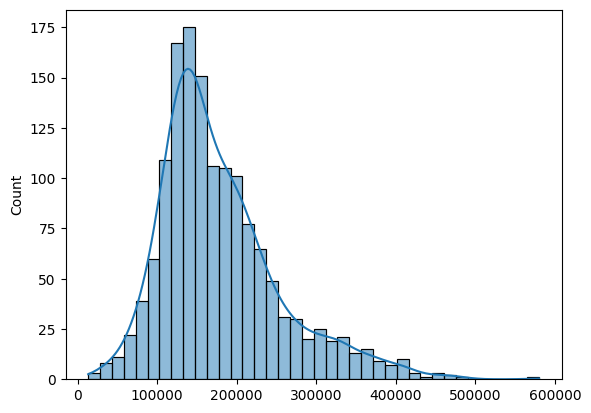

In [88]:
sns.histplot(preds, kde=True)

In [89]:
res = xnew[["Id"]]
res

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [90]:
res["SalePrice"] = preds
res

,Id,SalePrice
0,1461,119511.810074
1,1462,144675.926747
2,1463,168817.382693
3,1464,182887.189869
4,1465,198139.045505
...,...,...
1454,2915,81386.588256
1455,2916,75892.425172
1456,2917,176631.418843
1457,2918,99951.048422


In [91]:
res = res.round(2)
res

,Id,SalePrice
0,1461,119511.81
1,1462,144675.93
2,1463,168817.38
3,1464,182887.19
4,1465,198139.05
...,...,...
1454,2915,81386.59
1455,2916,75892.43
1456,2917,176631.42
1457,2918,99951.05


In [93]:
res.to_csv("HousePriceResults.csv", index=False)

### Save the pre and model in joblib format

In [94]:
%pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [95]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['MSSubClass', 'LotArea', 'OverallQual',
                                  'OverallCond', 'YearBuilt', 'MasVnrArea',
                                  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                                  'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                                  'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
                                  'Fireplaces',...
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['LandContour', 'Utilities', 'Neighborhood',
                                  'BldgType', 'HouseStyle', 'RoofMatl',
                                  'Exterior1st', 'MasVnrType', 'ExterQual',
                                  'BsmtQual', 'BsmtCond', 'BsmtExposure',
                                  'HeatingQC', 'KitchenQual', 'Functional',
                                  'FireplaceQu', 'GarageFinish', 'GarageCond',
                                  'MiscFeature'])])

In [96]:
import joblib
joblib.dump(pre2, "pre.joblib")

['pre.joblib']

In [97]:
joblib.dump(best_ridge, "ridge.joblib")

['ridge.joblib']

### Load the pre and model from files

In [98]:
p = joblib.load("pre.joblib")
p

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['MSSubClass', 'LotArea', 'OverallQual',
                                  'OverallCond', 'YearBuilt', 'MasVnrArea',
                                  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                                  'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                                  'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
                                  'Fireplaces',...
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['LandContour', 'Utilities', 'Neighborhood',
                                  'BldgType', 'HouseStyle', 'RoofMatl',
                                  'Exterior1st', 'MasVnrType', 'ExterQual',
                                  'BsmtQual', 'BsmtCond', 'BsmtExposure',
                                  'HeatingQC', 'KitchenQual', 'Functional',
                                  'FireplaceQu', 'GarageFinish', 'GarageCond',
                                  'MiscFeature'])])

In [99]:
m = joblib.load("ridge.joblib")
m

Ridge(alpha=np.float64(11.0))